In [2]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import os
import tweepy as tw
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# put word waht you want to search 
search_words = "INDIA"
date_since = "2018-11-16"
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = '0Ir6Qxok3uzNZk6ZzH1am7lg0'
        consumer_secret = 'FV5opfUVcdDcE9PbiqnHpCTet1wedFR7Fvc0Is2vkfycCQsXCb'
        access_token = '1272573063079419904-IjN1Ts1bMBH9sDkr1VcQNxGVn019Nr'
        access_token_secret = 'BwJ2IIfCeZDQx3eQvmOO3IIFfFuU4s9O14RjLH1cK1sJ1'
  
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
  
    def clean_tweet(self, tweet):
        
        #Utility function to clean tweet text by removing links, special characters
       # using simple regex statements.
       
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
                                    
  
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
  
    def get_tweets(self, query, count = 200):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
  
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = search_words, count = count,lang="en")
  
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
  
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
  
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
  
            # return parsed tweets
            return tweets
  
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = 'search_words', count = 200)
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
  
    # printing first 20 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:20]:
        print(tweet['text'])
  
    # printing first 20 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:20]:
        print(tweet['text'])
  
if __name__ == "__main__":
    # calling main function
    main()


Positive tweets percentage: 26.96629213483146 %
Negative tweets percentage: 17.97752808988764 %
Neutral tweets percentage: 55.056179775280896 %         


Positive tweets:
To all #Mach7 holders and my dear followers 🥰,

Please help me with this quick upvote on coinsniper, no need to reg… https://t.co/P0SMRxNBUC
RT @miriam97558735: #NEETMDS2021 #NEETMDSCOUNSELLING. These hashtags and our tweets never reach you. Are you really in Twitter sir? @drhars…
UK corona infections on the rise again, driven by new variant (first seen in India). National number still low, but… https://t.co/oisC8oTtv4
RT @ChiragR91835437: Today is SUPREME COURT'S hearing day of OUR PIL ‼🙏🏻.
SO we have to TWEET as much as we can and bring the hashtag
#Supr…
RT @deepakbhx: @iM_roncy Well this one of the most important point that I missed.
Modi funds are out of supervision by Paliament, by SC by…
RT @iPranavG: Shri @RahulGandhi pays homage to the first PM of India, Pandit Jawaharlal Nehru, on his death anniversary- at 

## Making WordCloud 

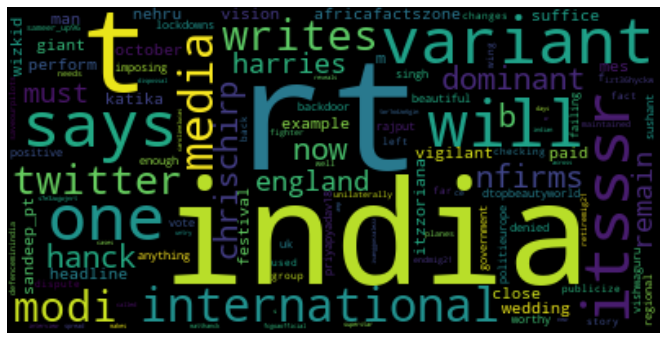

In [45]:
consumer_key = '0Ir6Qxok3uzNZk6ZzH1am7lg0'
consumer_secret = 'FV5opfUVcdDcE9PbiqnHpCTet1wedFR7Fvc0Is2vkfycCQsXCb'
access_token = '1272573063079419904-IjN1Ts1bMBH9sDkr1VcQNxGVn019Nr'
access_token_secret = 'BwJ2IIfCeZDQx3eQvmOO3IIFfFuU4s9O14RjLH1cK1sJ1'    

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#Define tweetSearch
def tweetSearch(query, limit = 10, language = "en", remove = []):  
    text = ""
    for tweet in tweepy.Cursor(api.search, q=query, lang=language).items(limit):
        text += tweet.text.lower()
    #removed unwanted words
    removeWords = ["https","co"]
    removeWords += remove
    #Replace unwanted words with empty space
    for word in removeWords:
        text = text.replace(word, "") 
    #return clean text
    return text
search1 = tweetSearch(search_words)
wordcloud = WordCloud().generate(search1)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Know who is Tweeting and make dataframe of user and location
You can access a wealth of information associated with each tweet. Below is an example of accessing the users who are sending the tweets related to #wildfires and their locations. Note that user locations are manually entered into Twitter by the user. Thus, you will see a lot of variation in the format of this value.

     * **tweet.user.screen_name** provides the user’s twitter handle associated with each tweet.
     * **tweet.user.location** provides the user’s provided location.
You can experiment with other items available within each tweet by typing **tweet**. and using the tab button to see all of the available attributes stored.

In [46]:
tweets = tw.Cursor(api.search, 
                           q=search_words,
                           lang="en",
                           since=date_since).items(25)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text


,user,location
0,anupriya_batra,
1,sushfanseg,
2,LLS_property,"Lincoln, England"
3,arsalan_peerzad,Karachi
4,EmmDee2406,
5,Ashutosh786,
6,BackupRupal,
7,Lucy03826575,
8,Hi_Akshay_Here,"Pune,Maharashtra"
9,supaez2015,
